In [2]:
%load_ext autoreload
%config Completer.use_jedi = False

In [945]:
%autoreload 2
import FEMOL
import numpy as np
np.set_printoptions(linewidth=200)
np.set_printoptions(suppress=True)
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d, griddata
import meshio

# Development Notebook for the FEMOL Project

In [902]:
# Square mesh
mesh = FEMOL.mesh.rectangle_Q4(1, 1, 25, 25)
# laminates and materials
plies1 = [0, 0, 0, 0]
plies2 = [90, 90]
flax = FEMOL.materials.general_flax()
carbon = FEMOL.materials.general_carbon()
layup1 = FEMOL.laminate.Layup(material=flax, plies=plies1, symetric=True)
layup2 = FEMOL.laminate.Layup(material=carbon, plies=plies2, symetric=False, h_core=0, z_core= 0.05 + carbon.hi)
# FEM problem definition
problem = FEMOL.FEM_Problem(mesh=mesh, physics='modal', model='plate')
problem.define_materials(flax, carbon)
problem.define_tensors(layup1, layup2)  # thick=1
# First modal solve
w, v = problem.solve(filtre=0)


solving using scipy
solved in :  14.486409187316895  s


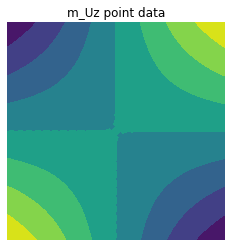

In [905]:
mesh.add_mode('m', v[3], 6)
mesh.wrap('m')
mesh.plot.point_data('m_Uz')
ref_vector = v[3]

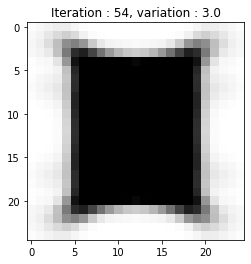

In [907]:
# solve the SIMP problem
SIMP = FEMOL.SIMP_VIBE(Problem=problem, objective='max eig')
mesh = SIMP.solve(ref_vector, save=False, plot=True, converge=0.03)



In [908]:
mesh.save('TOM_modal_90_90_mode0')

In [932]:
values = np.hstack([val for val in mesh.cell_data['zc'].values()])
points = np.hstack([pts for pts in mesh.cell_centers.values()])
X = griddata(points, values, mesh.points[:, :2], method='linear')
X[np.isnan(X)] = 0

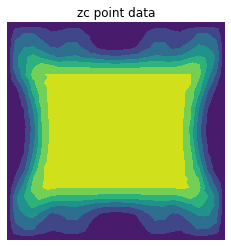

In [933]:
mesh.point_data['zc'] = X
mesh.plot.point_data('zc')

In [964]:
mesh.points[:,2] = mesh.point_data['zc']

In [966]:
points2 = mesh.points.copy()
points2[:, 2] = 0.
points = np.vstack([mesh.points, points2])
points.shape

(1352, 3)

In [1001]:
tris2 = mesh.plot.all_tris.copy()
tris2[:, 1:] = np.flip(mesh.plot.all_tris[:, 1:], axis=1)
tris2 += tris2.max() + 1
all_tris = np.vstack([mesh.plot.all_tris, tris2])
cells_list = [('triangle', all_tris)]
meshio_mesh = meshio.Mesh(points/5, cells_list)

In [1002]:
meshio_mesh.write('Case_study_core.stl')

In [1036]:
mesh_ref = FEMOL.mesh.rectangle_T3(1, 1, 1, 1)
points3 = mesh_ref.points.copy()
mesh_ref.points[:, 2] = 0.025
all_points = np.vstack([mesh_ref.points, points3])
cells = mesh_ref.all_cells.copy()
cells[:, 1:] = np.flip(mesh_ref.all_cells[:, 1:], axis=1)
cells += cells.max() + 1
wall_cells = np.array([[4, 5, 0], 
                       [5, 1, 0],
                       [5, 7, 1],
                       [7, 3, 1], 
                       [6, 3, 7],
                       [6, 2, 3],
                       [4, 2, 6],
                       [4, 0 ,2]])

all_cells = np.vstack([mesh_ref.all_cells, cells, wall_cells])
meshio_mesh = meshio.Mesh(all_points/5, [('triangle', all_cells.astype(int))])
meshio_mesh.write('reference_study_core.stl')

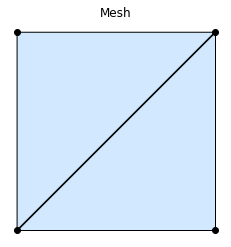

In [1034]:
mesh_ref.display(plot_nodes=True)

In [1027]:
cell = [4, 2, 6]
cell = [4, 0 ,2]
cell = 
cell = 
all_points

array([[0.   , 0.   , 0.025],
       [1.   , 0.   , 0.025],
       [0.   , 1.   , 0.025],
       [1.   , 1.   , 0.025],
       [0.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [0.   , 1.   , 0.   ],
       [1.   , 1.   , 0.   ]])